Link to github repo with the code: 

# Introduction

The subsequent paper endeavors to replicate and validate the findings posited by Jae Yong Ryu, Hyun Uk Kim, and Sang Yup Lee in their work titled "Deep learning improves prediction of drug–drug and drug–food interactions" (1).

In the aforementioned study, the authors seek to address the multilabel classification issue of Drug-Drug Interaction (DDI) and Drug-Food Interaction (DFI) through the utilization of a deep learning framework named DeepDDI, utilizing the DDI gold standard dataset. This is a particularly pertinent area within the healthcare domain, given that DDIs are associated with approximately 30% of all Adverse Drug Effects (2), especially in light of the fact that 67% of elderly Americans are reportedly taking five or more medications, including prescription drugs, over-the-counter drugs, and dietary supplements (3).

There have been two primary hurdles when addressing the challenges of DDIs and DFIs. For instance, preceding models prior to DeepDDI solely predict the probability of interaction between drugs without offering further insight into the pharmacological effects of the DDI. Additionally, many of these methodologies often necessitate a substantial amount of detailed drug information such as drug targets, interacting drugs, and side effects, which are frequently unavailable, as inputs to predict DDIs (4-10). Furthermore, prior methods developed have not been scrutinized with regard to analyzing DFIs.

The original paper employed Random Forest Classifiers and K-Nearest Neighbors as alternatives to DeepDDI, and their performance was assessed and juxtaposed (1).

The initial text introduced DeepDDI as a Deep Neural Network multi-label classifier to accurately discern DDIs and DFIs based on the DDI dataset. This work is innovative on multiple fronts. Initially, it capitalizes on DDI and its broad spectrum of compound types, many of which are natural products present in food, to predict Drug-Food Interactions. Additionally, it only necessitates the names of the two drugs under examination as input pairs, along with the simplified molecular-input line-entry system (SMILES) that delineates the structure of a chemical compound, to generate predictions.

DeepDDI attains a 92.4% mean accuracy (1), marking a notable advancement over other machine learning methodologies utilized for benchmarking. DeepDDI introduces a pioneering approach to addressing DDI and DFI challenges, exhibiting exceptional outcomes that could potentially enhance healthcare services and yield financial savings in Drug Development by accurately discerning the effects they may induce when interacting with food or other medications.




# Scope of Reproducibility:

## Hypothesis
Hypothesis 1: With a threshold of 0.47, DeepDDI acheives a 92.4% mean accuracy

Hypothesis 2: With a total of 9 hidden layers and 2048 nodes per layer, DeepDDI achieved the best accuracy 92.4%

Hypothesis 3: 100 epochs is the best number of training iterations to achieve these results

## Experiements to run:

  We will try to run the DeepDDI models with different values for number of epochs, number of hidden layers and nodes and different threshold values and we will compare our results with those of the paper. Currently, we are only trying to verify the results, given the length of time needed for training.

# Methodology

In [3]:
!pip install --upgrade pip

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     -- ------------------------------------- 0.1/2.1 MB 1.7 MB/s eta 0:00:02
     ---- ----------------------------------- 0.2/2.1 MB 1.9 MB/s eta 0:00:01
     ------ --------------------------------- 0.3/2.1 MB 1.9 MB/s eta 0:00:01
     -------- ------------------------------- 0.4/2.1 MB 2.0 MB/s eta 0:00:01
     --------- ------------------------------ 0.5/2.1 MB 1.9 MB/s eta 0:00:01
     ----------- ---------------------------- 0.6/2.1 MB 2.0 MB/s eta 0:00:01
     ------------- -------------------------- 0.7/2.1 MB 1.9 MB/s eta 0:00:01
     -------------- ------------------------- 0.8/2.1 MB 2.0 MB/s eta 0:00:01
     ---------------- ----------------------- 0.9/2.1 MB 2.0 MB/s eta 0:00:01
     ------------------- -------------------- 1.0/2.1 MB 2.1 MB/s eta 0:00:01
     --------------------- ------------------ 1.1/2.1 MB 2.1 MB/s eta 0:00:01



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\ismac\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
!pip install torch
!pip install matplotlib
!pip install pandas
!pip install torch torchvision

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.8 kB 960.0 kB/s eta 0:00:01
     ----------------------- -------------- 102.4/162.8 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.7 MB 1.7 MB/s eta 0:00:05
    --------------------------------------- 0.1/7.7 MB 1.8 MB/s eta 0:00:05
   - -------------------------------------- 0.2/7.7 MB 1.6 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.7 MB 1.6 MB/s eta 0:00:05
   - -------------------------------------- 0.4/7.7 MB 1.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/7.7 MB 1.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/7.7 MB 1.7 MB/s eta 0:00:05
   --- ------------------------------------ 0.6/7.7 MB 1.8 MB/s eta 0:00:04
   --- ---

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 1.7 MB/s eta 0:00:07
   ---------------------------------------- 0.1/11.6 MB 1.4 MB/s eta 0:00:08
    --------------------------------------- 0.2/11.6 MB 1.6 MB/s eta 0:00:08
    --------------------------------------- 0.3/11.6 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.6 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.6 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.5/11.6 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.6 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/11.6 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/11.6 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.9/11.6 MB 1.7 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/11.6 MB 1.8 MB/s eta 0:00:07
   ---

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.1/1.2 MB 2.1 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.2 MB 1.8 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.2 MB 1.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.2 MB 1.7 MB/s eta 0:00:01
   -------------- ------------------------- 0.4/1.2 MB 1.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.2 MB 1.8 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.2 MB 1.8 MB/s eta 0:00:01
   ----------------------- ---------------- 0.7/1.2 MB 1.8 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 1.9 MB/s eta 0:00:01
   ----------------------------- ---------- 0.9/1.2 MB 1.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.0/1.2 MB 1.8 MB/s eta 0:00:01
   -----------------------

In [6]:
!pip install scikit-learn
!pip install scipy

In [8]:
import torch

In [9]:
!pip install wheel setuptools --upgrade

   ---------------------------------------- 0.0/65.8 kB ? eta -:--:--
   ---------------------------------------- 65.8/65.8 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/894.6 kB ? eta -:--:--
   ---------------- ---------------------- 389.1/894.6 kB 11.8 MB/s eta 0:00:01
   -------------------------------- ------- 716.8/894.6 kB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 894.6/894.6 kB 8.0 MB/s eta 0:00:00


In [10]:
!pip install cmake

   ---------------------------------------- 0.0/36.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/36.2 MB 3.8 MB/s eta 0:00:10
   ---------------------------------------- 0.1/36.2 MB 2.1 MB/s eta 0:00:18
   ---------------------------------------- 0.2/36.2 MB 2.3 MB/s eta 0:00:16
   ---------------------------------------- 0.3/36.2 MB 2.1 MB/s eta 0:00:18
   ---------------------------------------- 0.4/36.2 MB 2.1 MB/s eta 0:00:17
    --------------------------------------- 0.5/36.2 MB 2.2 MB/s eta 0:00:16
    --------------------------------------- 0.6/36.2 MB 2.1 MB/s eta 0:00:17
    --------------------------------------- 0.7/36.2 MB 2.2 MB/s eta 0:00:17
    --------------------------------------- 0.8/36.2 MB 2.2 MB/s eta 0:00:16
   - -------------------------------------- 0.9/36.2 MB 2.1 MB/s eta 0:00:17
   - -------------------------------------- 1.0/36.2 MB 2.2 MB/s eta 0:00:17
   - -------------------------------------- 1.2/36.2 MB 2.2 MB/s eta 0:00:17
   - -

In [11]:
!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.2.2+cpu.html
     ---------------------------------------- 0.0/336.1 kB ? eta -:--:--
     - -------------------------------------- 10.2/336.1 kB ? eta -:--:--
     ---- -------------------------------- 41.0/336.1 kB 487.6 kB/s eta 0:00:01
     ---------- ------------------------- 102.4/336.1 kB 845.5 kB/s eta 0:00:01
     ------------------- ------------------ 174.1/336.1 kB 1.1 MB/s eta 0:00:01
     ------------------------------ ------- 266.2/336.1 kB 1.4 MB/s eta 0:00:01
     --------------------------------- ---- 297.0/336.1 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 336.1/336.1 kB 1.2 MB/s eta 0:00:00


Looking in links: https://data.pyg.org/whl/torch-2.2.2+cpu.html
     ---------------------------------------- 0.0/789.4 kB ? eta -:--:--
     -- ------------------------------------- 41.0/789.4 kB ? eta -:--:--
     --------- ---------------------------- 194.6/789.4 kB 3.9 MB/s eta 0:00:01
     ----------------------- -------------- 481.3/789.4 kB 5.0 MB/s eta 0:00:01
     -------------------------------------  788.5/789.4 kB 5.5 MB/s eta 0:00:01
     -------------------------------------- 789.4/789.4 kB 5.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.2+cpu.html
     ---------------------------------------- 0.0/506.8 kB ? eta -:--:--
     ---- ---------------------------------- 61.4/506.8 kB 3.2 MB/s eta 0:00:01
     -------------- ----------------------- 194.6/506.8 kB 2.9 MB/s eta 0:00:01
     --------------------------- ---------- 368.6/506.8 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 506.8/506.8 kB 4.0 MB/s eta 0:00:00


  Cloning https://github.com/pyg-team/pytorch_geometric.git to c:\users\ismac\appdata\local\temp\pip-req-build-9zb4u_0f
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 1cb7b04c018a2e7944f20d84cbb0945420c875e3
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/370.5 kB ? eta -:--:--
   --------------------------------------- 370.5/370.5 kB 11.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
   ---------------------------------------- 62.6/62.6 kB 3.3 MB/s

  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git 'C:\Users\ismac\AppData\Local\Temp\pip-req-build-9zb4u_0f'


In [16]:
%pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.10.0+cpu.html
%pip install torchdrug
# %pip install chemicalx
%pip install -e git+https://github.com/lucag2/chemicalx.git#egg=chemicalx

Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cpu.html
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Obtaining chemicalx from git+https://github.com/lucag2/chemicalx.git#egg=chemicalx
  Updating c:\users\ismac\downloads\src\chemicalx clone
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for chemicalx (pyproject.toml): s

  Running command git fetch -q --tags
  Running command git reset --hard -q 9a2a4900d58e5121cdcc62c7487fe507a136b937


In [5]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     - -------------------------------------- 0.2/4.1 MB 3.5 MB/s eta 0:00:02
     ---- ----------------------------------- 0.5/4.1 MB 5.0 MB/s eta 0:00:01
     ------------- -------------------------- 1.4/4.1 MB 9.6 MB/s eta 0:00:01
     ----------------------- ---------------- 2.4/4.1 MB 12.9 MB/s eta 0:00:01
     ---------------------------------------  4.0/4.1 MB 17.0 MB/s eta 0:00:01
     ---------------------------------------- 4.1/4.1 MB 16.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 GB 32.7 MB/s eta 0:01:16
     ---------------------------------------- 0.0/2.5 GB 29.5 MB/s eta 0:01:24
     ---------------------------------------- 0.0/2.5 GB 29.6 MB/s eta 0:01:23
     --------------------

  You can safely remove it manually.


In [1]:
# import  packages you need
import torch
import numpy as np
import chemicalx
# from google.colab import drive
from sklearn.metrics import *
from chemicalx.data import DrugbankDDI, BatchGenerator
from torch import nn
from chemicalx.data import DrugPairBatch
from chemicalx.models import Model
import pandas as pd
from matplotlib import pyplot as plt

C:\Users\ismac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##  Data

Note: The following script is used in the chemicalx library in order to clean and retrieved the drugbankDDI dataset. The model that is defined below it is also from the chemicalx library.

In [2]:
# """Download and pre-process the DrugBank drug-drug interaction dataset."""

# import math
# from random import Random

# import click
# import pandas as pd
# from utils import get_index, get_samples, get_tdc, write_artifacts


# @click.command()
# @click.option("--seed", type=int, default=42, show_default=True, help="Random seed")
# @click.option("--ratio", type=float, default=1.0, show_default=True, help="Negative sampling ratio")
# def main(seed: int, ratio: float):
#     """Download and pre-process the DrugBank DDI dataset."""
#     rng = Random(seed)
#     input_directory, output_directory = get_tdc("drugbank", "drugbankddi")

#     positive_samples = pd.read_csv(
#         input_directory.joinpath("drugbank.tab"),
#         sep="\t",
#         usecols=[0, 1, 2, 4, 5],
#         header=0,
#         names=["drug_1", "drug_2", "context", "drug_1_smiles", "drug_2_smiles"],
#     )
#     positive_samples["context"] = positive_samples["context"].map(lambda x: f"context_{x:02}")
#     print("Number of positive samples:", positive_samples.shape[0])
#     print("Columns:", positive_samples.columns)

#     contexts = list(sorted(set(positive_samples["context"].values.tolist())))
#     print("Number of contexts:", len(contexts))

#     # Index drugs' SMILES and drug-drug-context triples
#     drugs_raw, big_map = get_index(positive_samples)
#     drugs_raw.update(
#         {
#             "DB09323": "O.O.O.O.C(CNCC1=CC=CC=C1)NCC1=CC=CC=C1.[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)CC1=CC=CC=C1)C(O)=O.[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)CC1=CC=CC=C1)C(O)=O",  # noqa:E501
#             "DB13450": "[O-]S(=O)(=O)C1=CC=CC=C1.[O-]S(=O)(=O)C1=CC=CC=C1.COC1=CC2=C(C=C1OC)[C@@H](CC1=CC(OC)=C(OC)C=C1)[N@@+](C)(CCC(=O)OCCCCCOC(=O)CC[N@@+]1(C)CCC3=C(C=C(OC)C(OC)=C3)[C@H]1CC1=CC(OC)=C(OC)C=C1)CC2",  # noqa:E501
#             "DB09396": "O.OS(=O)(=O)C1=CC2=CC=CC=C2C=C1.CCC(=O)O[C@@](CC1=CC=CC=C1)([C@H](C)CN(C)C)C1=CC=CC=C1",
#             "DB09162": "[Fe+3].OC(CC([O-])=O)(CC([O-])=O)C([O-])=O",
#             "DB11106": "CC(C)(N)CO.CN1C2=C(NC(Br)=N2)C(=O)N(C)C1=O",
#             "DB11630": "C1CC2=NC1=C(C3=CC=C(N3)C(=C4C=CC(=N4)C(=C5C=CC(=C2C6=CC(=CC=C6)O)N5)C7=CC(=CC=C7)O)C8=CC(=CC=C8)O)C9=CC(=CC=C9)O",  # noqa:E501
#             "DB00958": "C1CC(C1)(C(=O)O)C(=O)O.[NH2-].[NH2-].[Pt+2]",
#             "DB00526": "C1CCC(C(C1)[NH-])[NH-].C(=O)(C(=O)O)O.[Pt+2]",
#             "DB13145": "C(C(=O)O)O.[NH2-].[NH2-].[Pt+2]",
#             "DB00515": "N.N.Cl[Pt]Cl",
#         }
#     )

#     drugs = list(drugs_raw)
#     print("Number of drugs:", len(drugs))

#     # Generate negative samples
#     negative_samples = get_samples(
#         rng=rng, n=int(math.ceil(ratio * positive_samples.shape[0])), drugs=drugs, contexts=contexts, big_map=big_map
#     )

#     labeled_triples = positive_samples[["drug_1", "drug_2", "context"]]
#     labeled_triples["label"] = 1.0
#     labeled_triples = pd.concat([labeled_triples, negative_samples])
#     print("Number of total triples:", labeled_triples.shape)
#     labeled_triples.to_csv(output_directory.joinpath("labeled_triples.csv"), index=False)

#     write_artifacts(output_directory=output_directory, drugs_raw=drugs_raw, contexts=contexts)


# if __name__ == "__main__":
#     main()

In [3]:
loader = DrugbankDDI()

context_set = loader.get_context_features()
drug_set = loader.get_drug_features()
triples = loader.get_labeled_triples()
cross_validation_split = 0.5
train, test = triples.train_test_split(train_size=cross_validation_split)

generator = BatchGenerator(batch_size=1024,
                           context_features=True,
                           drug_features=True,
                           drug_molecules=False,
                           context_feature_set=context_set,
                           drug_feature_set=drug_set,
                           labeled_triples=train)

# calculate statistics
def calculate_stats(train, test):
  # implement this function to calculate the statistics
  # it is encouraged to print out the results
  print(f"Cross Validation Split: {cross_validation_split}")
  print(f"Train Dataset Size: {len(train)}")
  print(f"Total number of drugs in Train: {train.get_drug_count()}")
  print(f'Total number of unique drug pairs in Train: {train.get_combination_count()}')
  print(f"Label split in Train (Positive, Negative): ({train.get_positive_count()}, {train.get_negative_count()})")
  print(f"Ratio of label split in Train (Positive, Negative): ({train.get_positive_rate()}, {train.get_negative_rate()})")
  print(f"Test Dataset Size: {len(test)}")
  print(f"Total number of drugs in Test: {test.get_drug_count()}")
  print(f'Total number of unique drug pairs in Test: {test.get_combination_count()}')
  print(f"Label split in Test (Positive, Negative): ({test.get_positive_count()}, {test.get_negative_count()})")
  print(f"Ratio of label split in Test (Positive, Negative): ({test.get_positive_rate()}, {test.get_negative_rate()})")
  return None

calculate_stats(train, test)

Cross Validation Split: 0.5
Train Dataset Size: 191808
Total number of drugs in Train: 1706
Total number of unique drug pairs in Train: 187091
Label split in Train (Positive, Negative): (96011, 95797)
Ratio of label split in Train (Positive, Negative): (0.5005578495161829, 0.4994421504838171)
Test Dataset Size: 191808
Total number of drugs in Test: 1706
Total number of unique drug pairs in Test: 187068
Label split in Test (Positive, Negative): (95797, 96011)
Ratio of label split in Test (Positive, Negative): (0.4994421504838171, 0.5005578495161829)


##   Model

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cuda


In [5]:
__all__ = [
    "DeepDDI",
]


class DeepDDI(Model):
    """An implementation of the DeepDDI model from [ryu2018]_.

    .. seealso:: This model was suggested in https://github.com/AstraZeneca/chemicalx/issues/2

    .. [ryu2018] Ryu, J. Y., *et al.* (2018). `Deep learning improves prediction
       of drug–drug and drug–food interactions <https://doi.org/10.1073/pnas.1803294115>`_.
       *Proceedings of the National Academy of Sciences*, 115(18), E4304–E4311.
    """

    def __init__(
        self,
        *,
        drug_channels: int,
        hidden_channels: int = 2048,
        hidden_layers_num: int = 9,
        out_channels: int = 1,
    ):
        """Instantiate the DeepDDI model.

        :param drug_channels: The number of drug features.
        :param hidden_channels: The number of hidden layer neurons.
        :param hidden_layers_num: The number of hidden layers.
        :param out_channels: The number of output channels.
        """
        super().__init__()
        assert hidden_layers_num > 1
        layers = [
            nn.Linear(drug_channels * 2, hidden_channels),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=hidden_channels, affine=True, momentum=None),
            nn.ReLU(),
        ]
        for _ in range(hidden_layers_num - 1):
            layers.extend(
                [
                    nn.Linear(hidden_channels, hidden_channels),
                    nn.ReLU(),
                    nn.BatchNorm1d(num_features=hidden_channels, affine=True, momentum=None),
                    nn.ReLU(),
                ]
            )
        layers.extend([nn.Linear(hidden_channels, out_channels), nn.Sigmoid()])
        self.final = nn.Sequential(*layers)

    def unpack(self, batch: DrugPairBatch):
        """Return the context features, left drug features and right drug features."""
        return (
            batch.drug_features_left,
            batch.drug_features_right,
        )

    def _combine_sides(self, left: torch.FloatTensor, right: torch.FloatTensor) -> torch.FloatTensor:
        return torch.cat([left, right], dim=1)

    def forward(
        self,
        drug_features_left: torch.FloatTensor,
        drug_features_right: torch.FloatTensor,
    ) -> torch.FloatTensor:
        """Run a forward pass of the DeepDDI model.

        :param drug_features_left: A matrix of head drug features.
        :param drug_features_right: A matrix of tail drug features.
        :returns: A column vector of predicted interaction scores.
        """
        hidden = self._combine_sides(drug_features_left, drug_features_right)
        return self.final(hidden)

model_2048 = DeepDDI(drug_channels=256).to(device)
model_1024 = DeepDDI(drug_channels=256, hidden_channels=1024).to(device)
model_128 = DeepDDI(drug_channels=256, hidden_channels=128).to(device)
model_256 = DeepDDI(drug_channels=256, hidden_channels=256).to(device)


##   Evaluation Implementation
- Definition and implementation of evaluation methods

- Metrics descriptions:

    - `Accuracy` : measures the proportion of correctly predicted instances out of the total instances. It is calculated by dividing the number of correct predictions by the total number of predictions.
    - `Precision`: Also known as positive predictive value, precision is the number of true positive predictions divided by the number of all positive predictions (true positives plus false positives). It measures the accuracy of positive predictions.
    - `Recall`: Also called sensitivity, recall is the number of true positive predictions divided by the number of actual positive instances (true positives plus false negatives). It measures the ability of the classifier to find all positive instances.
    - `F1-Score`: F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0.
    - `Root Mean Squared Error`: a commonly used metric for evaluating the accuracy of a regression model. It measures the average of the squares of the errors, where the error is the difference between the predicted value and the actual value. Then, it takes the square root of this average. Essentially, it gives an idea of how spread out the errors are.


In [6]:
def classification_metrics(Y_pred, Y_true):
    acc, precision, recall, f1score, rmse = accuracy_score(Y_true, Y_pred), \
                                          precision_score(Y_true, Y_pred), \
                                          recall_score(Y_true, Y_pred), \
                                          f1_score(Y_true, Y_pred), \
                                          root_mean_squared_error(Y_true, Y_pred)
    return acc,  precision, recall, f1score, rmse



#input: model
def evaluate(model):
    model.eval()

    generator.labeled_triples = test

    predictions = []
    for batch in generator:
      batch = batch.to(device)
      prediction = model(batch.drug_features_left, batch.drug_features_right)
      prediction = prediction.detach().cpu().numpy()
      identifiers = batch.identifiers
      identifiers["prediction"] = prediction
      predictions.append(identifiers)
      
      
    predictions_df = pd.concat(predictions)
    Y_true = predictions_df["label"]
    Y_pred = (predictions_df["prediction"] > 0.47).astype(int)
    acc, precision, recall, f1, rmse = classification_metrics(Y_true, Y_pred)
    return acc, precision, recall, f1, rmse

##   Training

In [7]:
def train_model_(num_epochs=100, model=None,optimizer=None,\
                loss = torch.nn.BCELoss()):
  
  if optimizer == None:
    optimizer= torch.optim.Adam(model.parameters())
    
  train_loss_arr = []
  metrics_results = []
  for _ in range(num_epochs):
    model.train()
    train_loss_value = 0
    for batch in generator:
      optimizer.zero_grad()

      # Move data to GPU
      drug_features_left = batch.drug_features_left.to(device)
      drug_features_right = batch.drug_features_right.to(device)
      labels = batch.labels.to(device)
      
      prediction = model(drug_features_left, drug_features_right)

      loss_value = loss(prediction, labels)
      loss_value.backward()

      optimizer.step()
      train_loss_value += loss_value.item()
    train_loss = train_loss_value / len(generator)

    train_loss_arr.append(train_loss)
    metrics_results.append(evaluate(model))

  return train_loss_arr, metrics_results

In [9]:
trained_model_128 = train_model_(num_epochs=100, model=model_128)
trained_model_256 = train_model_(num_epochs=100, model=model_256)
trained_model_1024= train_model_(num_epochs=100, model=model_1024)
trained_model_2048 = train_model_(num_epochs=100, model=model_2048)

# Results

In [10]:
%matplotlib inline

In [11]:
def results(trained_model):
  def plot_metric(ax, metric_list, label, title):
    ax.plot(metric_list, label=label)
    ax.set_xlabel('Epoch')
    ax.set_title(title)
    ax.legend()

  metrics_results = trained_model[1]
  train_loss_arr = trained_model[0]
  acc_list, precision_list, recall_list, f1_list, rmse_list = zip(*metrics_results)

  # metrics to evaluate my model
  print(f"ACC: {np.mean(np.array(list(acc_list))):.3f}, Precision: {np.mean(np.array(list(precision_list))):.3f},Recall: {np.mean(np.array(list(recall_list))):.3f}, F1: {np.mean(np.array(list(f1_list))):.3f}, RMSE: {np.mean(np.array(list(rmse_list))):.3f}")

  # plot figures to better show the results
  fig, axes = plt.subplots(2, 3, figsize=(15, 8))
  
  plot_metric(axes[0, 0], train_loss_arr, "Training Loss", "Model Loss During Training")

  plot_metric(axes[0, 1], list(acc_list), "Accuracy", "Model Accuracy During Training")
  plot_metric(axes[0, 2], list(precision_list), "Precision", "Precision During Training")
  plot_metric(axes[1, 0], list(recall_list), "Recall", "Recall Value During Training")
  plot_metric(axes[1, 1], list(f1_list), "F1 Score", "F1 Score During Training")
  plot_metric(axes[1, 2], list(rmse_list), "RMSE Score", "RMSE Value During Training")
  # it is better to save the numbers and figures for your presentation.

  plt.tight_layout()
  plt.show()

ACC: 0.849, Precision: 0.804,Recall: 0.883, F1: 0.841, RMSE: 0.387


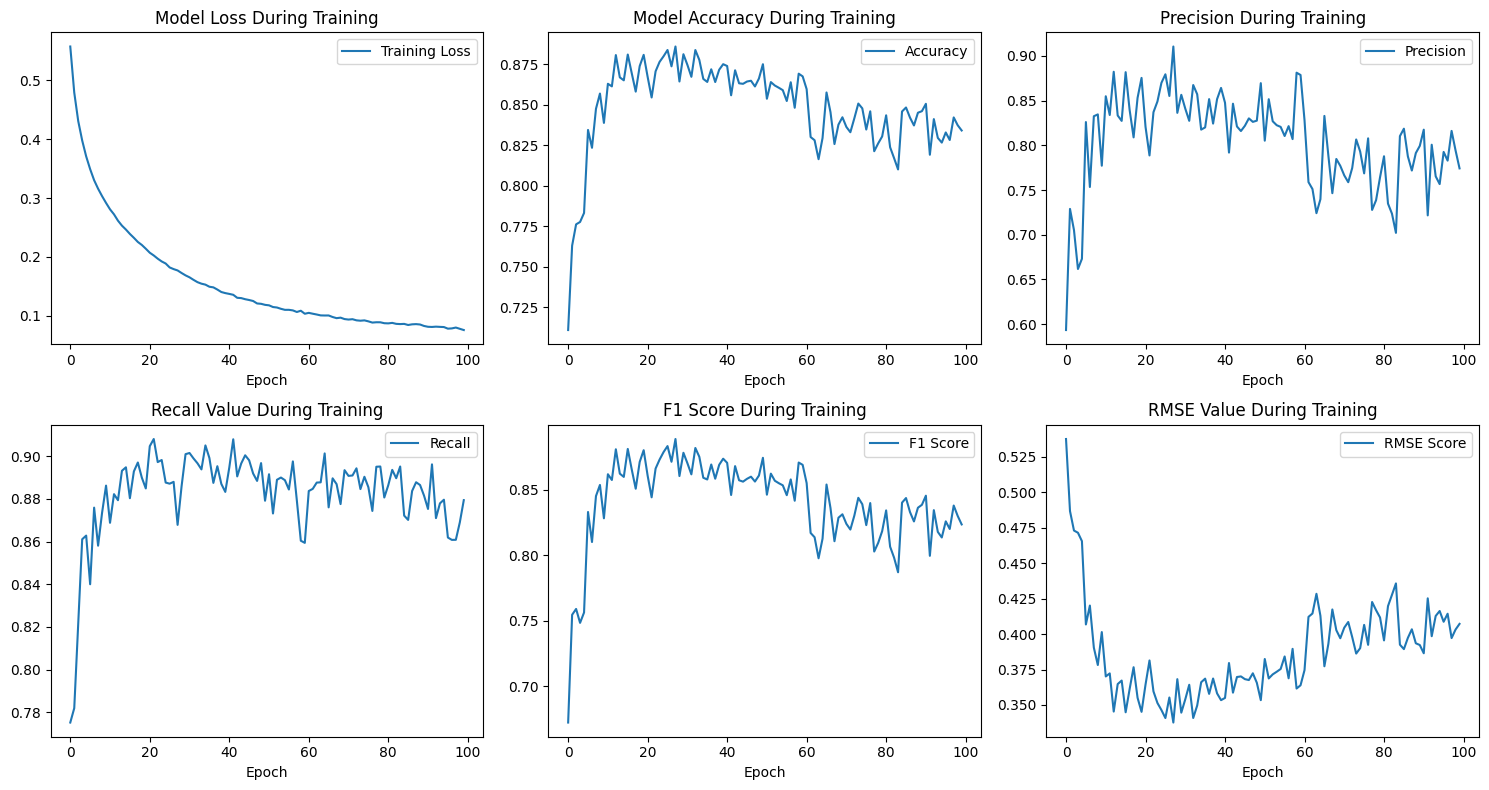

In [12]:
results(trained_model_128)

ACC: 0.861, Precision: 0.798,Recall: 0.913, F1: 0.850, RMSE: 0.371


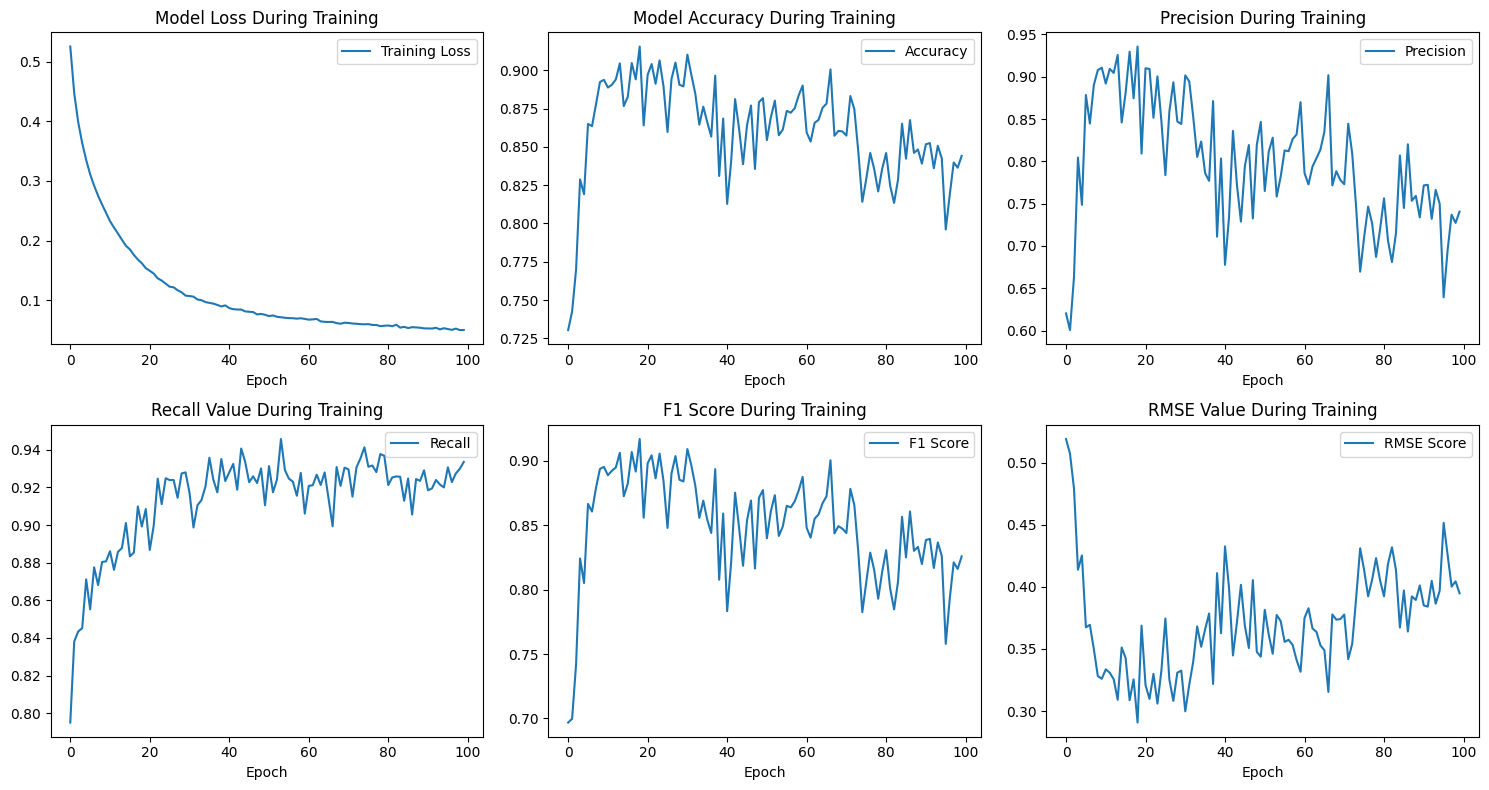

In [13]:
results(trained_model_256)

ACC: 0.921, Precision: 0.943,Recall: 0.903, F1: 0.922, RMSE: 0.279


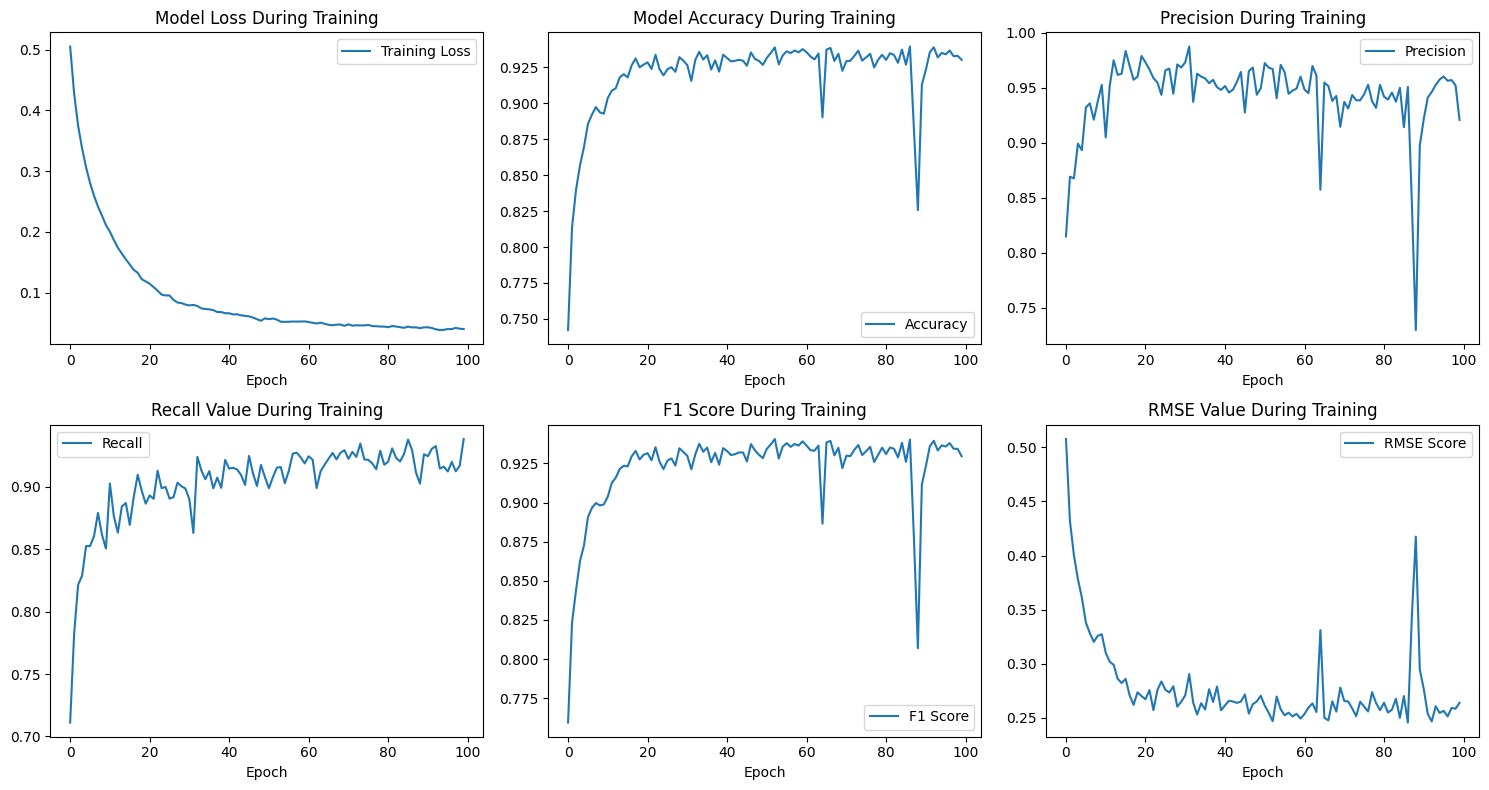

In [14]:
results(trained_model_1024)

ACC: 0.922, Precision: 0.954,Recall: 0.898, F1: 0.924, RMSE: 0.273


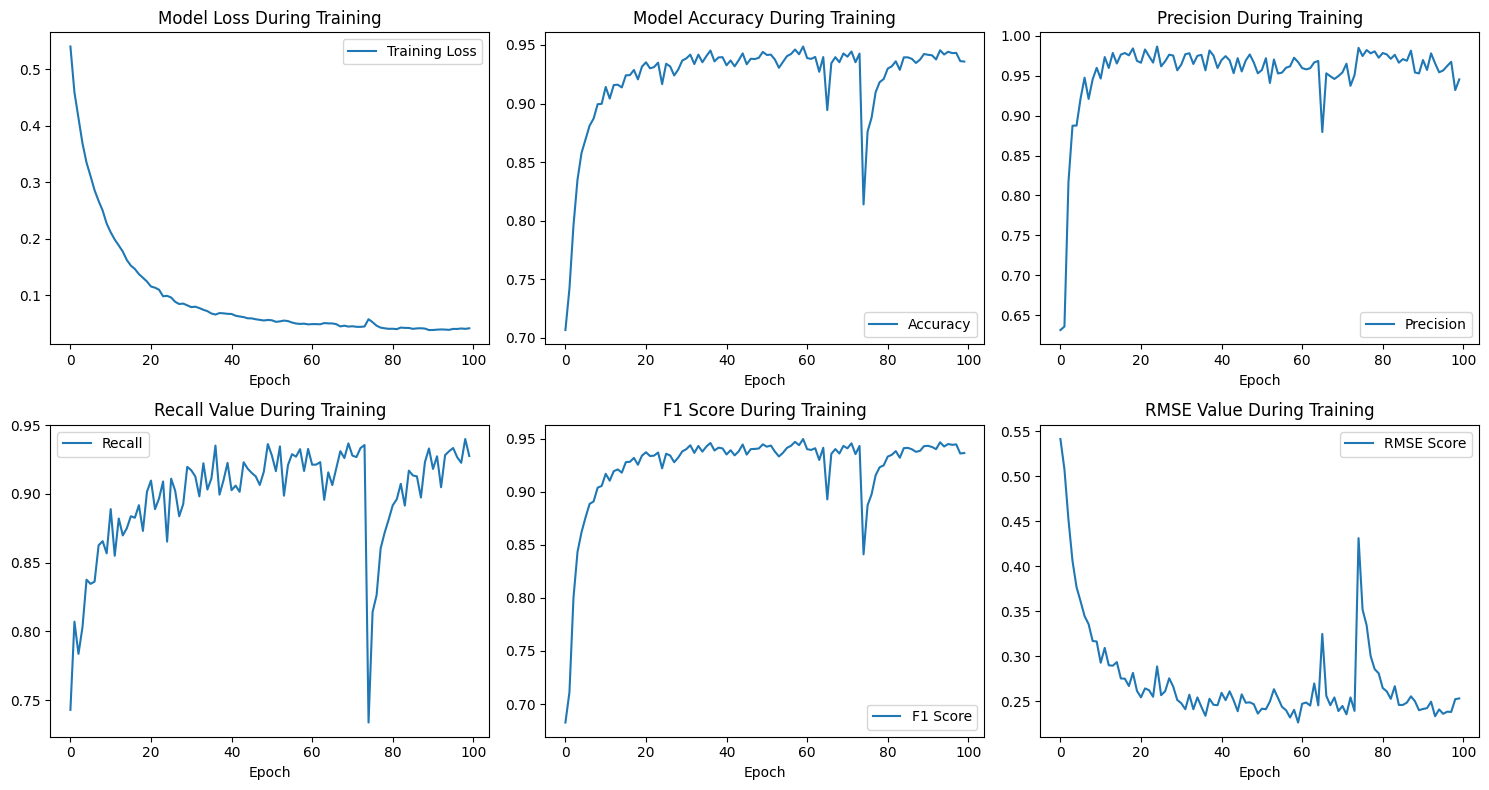

In [15]:
results(trained_model_2048)

## Model comparison

According to the original paper, DeepDDI achieves a 92.4% accuracy when trained for 100 epochs and the hidden layers have 2048 nodes each. We were able to verify these results achieving 92.2% accuracy for our model with 2048 nodes. Moreover, we saw a steady increase in accuracy from 128 nodes initially to 2048 in the last model. Similarly, RMSE and Training loss decreased as the number of nodes in the layers increased while Precision, Recall and F1-Score increased. From this results we can conclude, that the DeepDDI model achieves best results with 2048 nodes in each one of the hidden layers. 

# Discussion

We were able to reproduce this paper following the model implementation and procedures from ChemicalX. Loading the data was very simple as was training the model given the template supplied by the library. In addition, leveraging the evaluation metrics from the `skelearn` library, we had a simple way of assessing the quality of our models. The most difficult part in terms of reproducibility was the set up. The models had to be trained offline because of the memory and CPU caps in Colab. Moreover, we had to use the `cuda` application to leverage an Nvidia GTXForce 4060 to aid during training. Without the GPU it took nine hours to train all four models, while with the GPU we were able to train the model in one hour. Also, the library does not seem to be maintained (it requires Python version 3.8). Some versions and pinned to older Python versions which were not compatible with the Colab Environment. We had to fork the repo (https://github.com/lucag2/chemicalx) and unpin the versions manually. During the next phase, we plan to run the models with different number of epochs and all combinations of nodes. In addition, we want to test the performance with values different than `0.47` for the threshold. 

# References

1. Ryu, J.Y.; Kim, H.U.; Lee, S.Y. Deep learning improves prediction of drug–drug and drug–food interactions. Proc. Natl. Acad. Sci. USA 2018, 115, E4304–E4311 https://doi.org/10.1073/pnas.1803294115

2. Pirmohamed, M., & Orme, M. (1998). Drug interactions of clinical importance. Davies’s textbook of adverse drug reactions, 888-912.

3. DM Qato, J Wilder, LP Schumm, V Gillet, GC Alexander, Changes in prescription and over-the-counter medication and dietary supplement use among older adults in the United States, 2005 vs 2011. JAMA Intern Med 176, 473–482 (2016) https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/2500064

4. F Cheng, Z Zhao, Machine learning-based prediction of drug-drug interactions by integrating drug phenotypic, therapeutic, chemical, and genomic properties. J Am Med Inform Assoc 21, e278–e286 (2014).

5. A Gottlieb, GY Stein, Y Oron, E Ruppin, R Sharan, INDI: A computational framework for inferring drug interactions and their associated recommendations. Mol Syst Biol 8, 592 (2012).

6. P Zhang, F Wang, J Hu, R Sorrentino, Label propagation prediction of drug-drug interactions based on clinical side effects. Sci Rep 5, 12339 (2015).

7. S Vilar, et al., Similarity-based modeling in large-scale prediction of drug-drug interactions. Nat Protoc 9, 2147–2163 (2014).

8. MA Yildirim, KI Goh, ME Cusick, AL Barabási, M Vidal, Drug-target network. Nat Biotechnol 25, 1119–1126 (2007).

9. K Park, D Kim, S Ha, D Lee, Predicting pharmacodynamic drug-drug interactions through signaling propagation interference on protein-protein interaction networks. PLoS One 10, e0140816 (2015).

10. J Huang, et al., Systematic prediction of pharmacodynamic drug-drug interactions through protein-protein-interaction network. PLoS Comput Biol 9, e1002998 (2013).

11. Benedek Rozemberczki, Charles Tapley Hoyt, Anna Gogleva, Piotr Grabowski, Klas Karis, Andrej Lamov, Andriy Nikolov, Sebastian Nilsson, Michael Ughetto, Yu Wang, Tyler Derr, and Benjamin M. Gyori. 2022. ChemicalX: A Deep Learning Library for Drug Pair Scoring. In Proceedings of the 28th ACM SIGKDD Conference on Knowledge Discovery and Data Mining (KDD '22). Association for Computing Machinery, New York, NY, USA, 3819–3828. https://doi.org/10.1145/3534678.3539023


